# Section 1 - The leaky-integrate and fire (LIF) model and python basics

## Section 1.1. 

In order to write programming scripts, we need a few basics: 

We will program our scripts in python, a very versatile and widely used programming language. 
To execute the written programs we need a <i>python interpreter</i>. Google colab allows us to run an instance in the browser, without the need to install anything locally on the computer. 




While learning the basics of python, we want to look at an example model taught in the lecture. The leaky integrate and fire (LIF) model. 
<div>
<img src="https://github.com/comp-neural-circuits/intro-to-comp-neuro/raw/dev/notebooks/Exc_1/static/neuron_to_circuit.png" width="750"/>
</div>

From the lecture we know that we can describe the change of the membrane potential with the following equation:

\begin{equation}
\tau_m\,\frac{dV}{dt} = - V + E_{L} + R_m\,I_e \qquad (1)
\end{equation}

We ignore the injected external current for now ($I_e = 0$) which means the equation simplifies to 
\begin{equation}
\tau_m\,\frac{dV}{dt} = - V + E_{L} \qquad (2)
\end{equation}

in this equation we have three parameters, let's define them. 

#### Task X - Execute the cell below
When executing a cell, the python interpreter will run the code we provide.

When you select the cell and either press 'Run' at the top of the page or press 'shift+Enter' on the keyboard. 

try it out:

In [1]:
tau_m = 20 # in ms
v = -50 # in mV
el = -60 # in mV
print (tau_m, v, el)

20 -50 -60


#### Solution X -  What happend
1-3 We assigned values (on the right side of the equal sign) to three distinct variables (on the left of the equal sign).

In addition, we can comment the code by using the '#' symbol. Everything in the same line behind this symbol will be ignored when the code is executed.

5 At the end, we print the values that we just defined

Following equation (2), we can now calculate the change in the membrane voltage per time-step. 

In [2]:
tau_m = 20 # in ms
v = -50 # in mV
el = -60 # in mV
dv_dt = (-v + el)/tau_m
print (dv_dt)

-0.5


This means the membrane potential changes by -0.5mV per ms if the membrane potential is at -50 mV. 

#### Task X - Calculate the voltage change for multiple time steps

After applying the change in voltage as we did above for one time step (adding -0.5mV/ms * 1ms to -50mV), we can ask again what the change is - given the new voltage value, then apply this again and so on

In [3]:
tau_m = 20 # in ms
v = -50 # in mV
el = -60 # in mV
dt = 0.1 # in ms
dv_dt = (-v + el)/tau_m
print ('dv/dt', dv_dt)
v = v + dv_dt * dt
print ('v', v)
dv_dt = (-v + el)/tau_m
print ('dv/dt', dv_dt)
v = v + dv_dt * dt
print ('v', v)

dv/dt -0.5
v -50.05
dv/dt -0.49750000000000016
v -50.09975


#### Solution X - What happend

1-4 We defined our variables (now we also define our time step dt)

5 calculating the instantaneous change in v

6 printing the calculated value, while also printing what the value is

7 setting v equal to its old value plus the change it experiences multiplied with our chosen timestep

8 printing v (and printing that we print v)

9 we repeat the steps 3) to 6)

Now thinking about even more repeats of these steps leads us to a very fundamental concept of programming: 

## Loops
More specifically, the for-loop.
Loops allow us to execute the same code multiple times, or even to let programs run indefinetly. We can re-write the above code with a for-loop.

#### Task X - Change the number of repetitions

Initially we execute the code block from above (2 times). You can change how often it will be repeated by changing the number in the 'range' function. Try it out.

In [4]:
tau_m = 20 # in ms
v = -50 # in mV
el = -60 # in mV
dt = 0.1 # in ms

for ii in range(2):
    dv_dt = (-v + el)/tau_m
    print ('dv/dt', dv_dt)
    v = v + dv_dt * dt
    print ('v', v)

dv/dt -0.5
v -50.05
dv/dt -0.49750000000000016
v -50.09975


#### More information on the for-loop

You just executed a for-loop. The syntax of a for-loop is the following:
```python
    for iteration_variable in values_to_iterate_through:
        # do something
```

In our case the iteration variable is ii and the values_to_iterate_through are provided by the function range() where we can provide an input paramter.

It is important to note that we see an indentation after we defined our for-loop (and ended the line with a colon)

Everything that is indented will be executed within the loop. 
You can try it out with the example above by removing the indent for the last line. v will then be printed only when the loop is done.

Ususally, people use four or two spaces as the indentation level (or pressing TAB).

You can also access the iteration variable in the for-loop. you can try out the example below.   

#### Task X - Answer the following questions

0) execute the cell

1) what is the starting/ending value for the iteration variabel ii, does it make sense to you?

2) you will see that the iteration variable takes on integer values, how can you get floating point steps instead? - try it out

In [5]:
for ii in range(4):
    print (ii)

0
1
2
3


#### solution X

1) we start with the integer 0 and we always end one step before the value x (i.e. x-1) that we provide for the range function (so we always iterate for x steps)

2) to get floating point steps we can multiply our integer values with the floating point number we prefer (for example 0.1) 

We now use the for loop to run our code from above many times and look at the final value of v

#### Task  X - Change the starting value of v

When executing the cell below, you can now change the starting value of v. 

However, you should see that (given we have enough repetitions), your final v should always be very close to the same value. Can you explain why this is correct?

In [6]:
tau_m = 20 # in ms
el = -60 # in mV
dt = 0.1 # in ms

v = -50 # in mV

for ii in range(1000):
    dv_dt = (-v + el)/tau_m
    v = v + dv_dt * dt

print ('final v', v)

final v -59.93346031421166


#### Solution X 

we still simulate the time evolution of the membrane voltage v following equation (2). The equation describes how much the voltage changes, given it's current value and the fixed parameters we define at the beginning. We can see that the right side of the equation becomes 0, when v equals el. This means that there will be no change anymore - we reached a stable configuration, a fixed point. 

in a rather simple system like this, we can then realize that v will always evolve towards the value of 'el', independent of the starting value (the starting condition).

Bonus: you can actually calculate the integral of equation (2), what function do you get out? We will come back to this later ...

Until now we defined how v should evolve over time and we can see what the final value of v is, or print intermediate values of v. Ultimately, we want to save the values of v between the beginning and the end, in order to access them later on. This leads us to another variable type.

## Lists

Lists can store multiple varibales of the same, or even of different types. A list is defined like this
```python
    example_list = [1,2,3]
    empty_list = []
```
We can append elements to this list with 
```python
    empty_list.append(1)
```

#### Task x - save all intermediate values of v

can you re-write the code from above, so that we do not only print the final v but a list of all v's after the loop has finsihed?

In [7]:
tau_m = 20 # in ms
v = -50 # in mV
el = -60 # in mV
dt = 0.1 # in ms
v_list = []

# continue here with your code

#### Solution X 

```python
tau_m = 20 # in ms
v = -50 # in mV
el = -60 # in mV
dt = 0.1 # in ms
v_list = []
for ii in range(10):
    dv_dt = (-v + el)/tau_m
    v = v + dv_dt * dt
    v_list.append(v) 

print (v_list)
```

Great! We now have run a simulation of the time evolution of the membrane voltage and saved the values of v. However, we would also like to have the corresponding values of the time that passed for every voltage value. 

#### Task X - save the time values as well

Can you re-write the code above, to not only save and print the voltage values, but also do the same for the time steps? 

#### Solution X 

```python
tau_m = 20 # in ms
v = -50 # in mV
el = -60 # in mV
dt = 0.1 # in ms
v_list = []
t_list = []
for ii in range(10):
    dv_dt = (-v + el)/tau_m
    v = v + dv_dt * dt
    v_list.append(v) 
    t_list.append(ii*dt)

print (v_list, t_list)
```

To get a better understanding of how the voltage evolves, we want to visualize the data.

## Plots

To visualize with python, we make use of a library. Libraries provide pre-written functions, so we don't have to write them from scratch. To import a library we have to add the following line (usually always at the beginning of the code)
```python
    import matplotlib.pyplot as plt
```
with this line we can import the library matplotlib.pyplot and we can call it from then on with the the name plt 
Once imported, we can use this command in each cell of the notebook.

#### Task X - Play around

In the cell below you can play around with plotting. 
here is the original code of the cell in case you want to reset:
```python
import matplotlib.pyplot as plt

plt.figure()
plt.title('Example Plot')
x = [0,1]
y = [1,2]
plt.plot(x,y,color='red', linewidth=2.5)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()
```
<div>
<img src="https://github.com/comp-neural-circuits/intro-to-comp-neuro/raw/dev/notebooks/Exc_1/static/simple_line_plot.png" width="350"/>
</div>


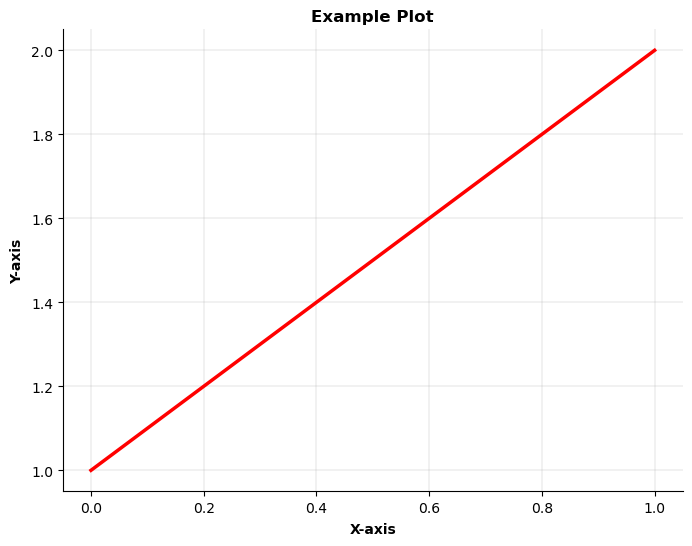

In [8]:
import matplotlib.pyplot as plt
plt.style.use("https://github.com/comp-neural-circuits/intro-to-comp-neuro/raw/dev/plots_style.txt")

plt.figure()
plt.title('Example Plot')
x = [0,1]
y = [1,2]
plt.plot(x,y,color='red', linewidth=2.5)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

#### Solution X - What happend

1 We import the library that we need for plotting. Once imported, we will be able to use it in every cell in this notebook. So for the next notebooks we will import it at the beginning.

2 We use a file for the style of the plots


3 We create a figure.

4 We add a title to the figure

5/6 we define our x- and y- values

7 we create a line-plot (plt.plot) the first argument of the function have to be the x-values, the second the y-values. then we have some specified parameters, like the color or the linewidth. If you are interested - there are many paramters more we can modify - we'll learn about them later on

8/9 we label the x- and y-axis

10 we show the plot - this line is not necessary in notebooks like this one, but you need it for python scripts for example. 


#### Task X - Plot the time evolution of the membrane voltage

Try to combine the code where we calculate and save the v and t values and the plotting code to create a figure that should look roughly like this:

(with a starting value of v = -55, a timestep dt=0,1 and iterating over range(1000) )

<div>
<img src="https://github.com/comp-neural-circuits/intro-to-comp-neuro/raw/dev/notebooks/Exc_1/static/membrane_voltage_decay.png" width="350"/>
</div>


In [9]:
### Add your code here

#### Solution X

```python
tau_m = 20 # in ms
v = -50 # in mV
el = -60 # in mV
dt = 0.1 # in ms
v_list = []
t_list = []

for ii in range(1000):
    dv_dt = (-v + el)/tau_m
    v = v + dv_dt * dt
    v_list.append(v) 
    t_list.append(ii*dt) # we multiply our time step with our iteration variable to get the time

plt.figure()
plt.title('Time evolution of membrane voltage')
plt.plot(t_list,v_list,linewidth=2.5)
plt.xlabel('Time in ms')
plt.ylabel('Voltage in mV')
plt.show()
```

#### In context

Make sure that you understand what the plot shows us.

We can see the development of the membrane potential over time for our neuron model. When we set it to a certain value (for example -55 mV) it will constantly change until it reaches the resting potential 'el'.

We now want to further explore the behavior with interactive tools, but for that we first need to introduce another programming concept: **Functions**


## Functions

A function allows us to structure our code more efficiently. A function can take arguments, execute code when it's called and return values once its finished. The general structure looks like this

```python
def function_name (parameter):
    
    # execute code (we can use the variable 'parameter' here)
    
    return values
```

There are many important apsects about functions behind this simple introduction, but we will cover these when they become relevant. Note, however, that we again have the indent behind our first line (that closes with a colon) to indicate which lines belong to the function. For now, we will start by re-writing the code we already have for the time evolution of the membrane potential into a function

```python
def voltage_evolution(v_start):
    tau_m = 20 # in ms
    el = -60 # in mV
    dt = 0.1 # in ms
    v = v_start
    
    v_list = []
    t_list = []    

    for ii in range(1000):
        dv_dt = (-v + el)/tau_m
        v = v + dv_dt * dt
        v_list.append(v) 
        t_list.append(ii*dt) # we multiply our time step with our iteration variable to get the time
        
    return v_list, t_list
```

All we did now is taking the code from above and putting it into the structure of a function. 
We name the fucntion 'voltage_evolution' and we define an argument 'v_start'. This argument is used within the function to set our parameter of v. 
In the end, we then pass v_list and t_list.

Now we will use this function, to see how different starting conditions of the membrane potential lead to different voltage traces.

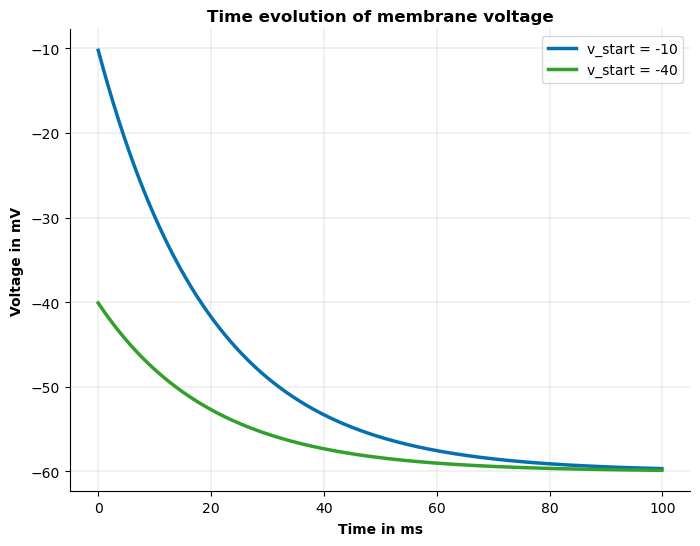

In [10]:
def voltage_evolution(v_start):
    tau_m = 20 # in ms
    el = -60 # in mV
    dt = 0.1 # in ms
    v = v_start
    
    v_list = []
    t_list = []    

    for ii in range(1000):
        dv_dt = (-v + el)/tau_m
        v = v + dv_dt * dt
        v_list.append(v) 
        t_list.append(ii*dt) # we multiply our time step with our iteration variable to get the time
        
    return v_list, t_list



plt.figure()
plt.title('Time evolution of membrane voltage')

v_list_1, t_list_1 = voltage_evolution(v_start=-10)
plt.plot(t_list_1,v_list_1,linewidth=2.5, label='v_start = -10')

v_list_2, t_list_2 = voltage_evolution(v_start=-40)
plt.plot(t_list_2,v_list_2,linewidth=2.5, label='v_start = -40')

plt.xlabel('Time in ms')
plt.ylabel('Voltage in mV')
plt.legend()
plt.show()

####  What happend

We now took the code we already wrote earlier and changed it slightly. First we defined the function "voltage_evolution" 
It is important to note that when executing a cell where we define a function, this function is not executed but only defined. To execute it we have to call it first. 

This is what we do just before we plot t_list_1 & v_list_1 and again before we plot t_list_2 & v_list_2
Our function is then executed with the value for v_start that we specify and once it finishes it returns the created lists. We can then use these lists to plot the results.


#### Task X - change the code so that you can vary other parameters

change the function (and the parts where the function is called), so that you can change other parameters of the function (for exmaple el) to see how they effect the changes of the membrane voltage. 

(when looking at other parameters, you should also make sure to adjust the labels of the plot)


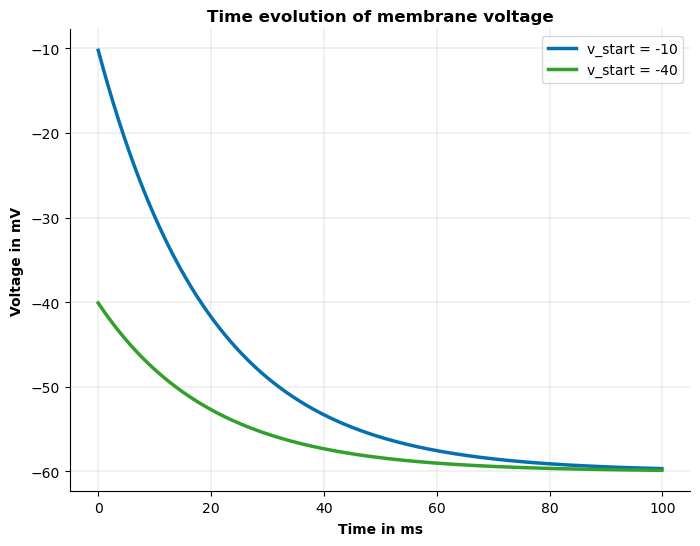

In [11]:
#Change the code in this cell. You can always copy the code from above in case something breaks that you cannot recover

def voltage_evolution(v_start):
    tau_m = 20 # in ms
    el = -60 # in mV
    dt = 0.1 # in ms
    v = v_start
    
    v_list = []
    t_list = []    

    for ii in range(1000):
        dv_dt = (-v + el)/tau_m
        v = v + dv_dt * dt
        v_list.append(v) 
        t_list.append(ii*dt) # we multiply our time step with our iteration variable to get the time
        
    return v_list, t_list



plt.figure()
plt.title('Time evolution of membrane voltage')

v_list_1, t_list_1 = voltage_evolution(v_start=-10)
plt.plot(t_list_1,v_list_1,linewidth=2.5, label='v_start = -10')

v_list_2, t_list_2 = voltage_evolution(v_start=-40)
plt.plot(t_list_2,v_list_2,linewidth=2.5, label='v_start = -40')

plt.xlabel('Time in ms')
plt.ylabel('Voltage in mV')
plt.legend()
plt.show()

#### Solution X - What happend

```python
def voltage_evolution(el, v_start=-50):
    tau_m = 20 # in ms
    dt = 0.1 # in ms
    v = v_start
    
    v_list = []
    t_list = []    

    for ii in range(1000):
        dv_dt = (-v + el)/tau_m
        v = v + dv_dt * dt
        v_list.append(v) 
        t_list.append(ii*dt) # we multiply our time step with our iteration variable to get the time
        
    return v_list, t_list



plt.figure()
plt.title('Time evolution of membrane voltage')

v_list_1, t_list_1 = voltage_evolution(el=-70)
plt.plot(t_list_1,v_list_1,linewidth=2.5, label='el = -70')

v_list_2, t_list_2 = voltage_evolution(el=-60)
plt.plot(t_list_2,v_list_2,linewidth=2.5, label='el = -60')

plt.xlabel('Time in ms')
plt.ylabel('Voltage in mV')
plt.legend()
plt.show()
```


<div>
<img src="https://github.com/comp-neural-circuits/intro-to-comp-neuro/raw/dev/notebooks/Exc_1/static/different_el_values.png" width="450"/>
</div>


Here we now added el as a parameter to the function (another solution would be to replace v_start). We also now set a default value for v_start, so that we do not have to give a value for that if we call the function.

#### Task X - Look at the paramters

We now use another library called ipywidgets that allows us to build interactive plots. We have to import the interactive function and can then call our defined function and define the paramters we want to vary, we do so by specifying the range for each parameter in the following fashion:

```python
chosen_parameter = (start_value, end_value, step_size)
````

To make it more convenient, we now combine the simulation and the plotting part into one function.

You can try it out by executing the cell below and explore how the different parameters influence how the membrane voltage evolves.

In [22]:
from ipywidgets import interact

def voltage_evolution(el, tau_m, v):
    dt = 1 # in ms

    v_list = []
    t_list = []    

    for ii in range(100):
        dv_dt = (-v + el)/tau_m
        v = v + dv_dt * dt
        v_list.append(v) 
        t_list.append(ii*dt) # we multiply our time step with our iteration variable to get the time

    
    return v_list, t_list


def run_simulation_and_show_plot(el, tau_m, v):
    
    v_list, t_list = voltage_evolution(el, tau_m, v)

    plt.figure()
    plt.title('Time evolution of membrane voltage')

    plt.plot(t_list,v_list,linewidth=2.5)

    plt.xlabel('Time in ms')
    plt.ylabel('Voltage in mV')
    
    plt.ylim([-185,65])
    plt.show()
    
interact(run_simulation_and_show_plot, el=(-180,60,2), tau_m=(1,30,1), v=(-180,60,2))


interactive(children=(IntSlider(value=-60, description='el', max=60, min=-180, step=2), IntSlider(value=15, de…

<function __main__.run_simulation_and_show_plot(el, tau_m, v)>

### Input currents

Now we have seen how the membrane voltage evolves over time when we initialize it at a certain value and do not interfere with it otherwise. Now we want to come back to equation (1)

\begin{equation}
\tau_m\,\frac{dV}{dt} = - V + E_{L} + R_m\,I_e \qquad (1)
\end{equation}

Therefore we now want to add the possibility to inject a current into the cell, to see how this influences the dynamics. 

We have to modify how the voltage changes in each time step
```python
dv_dt = (-v + el)/tau_m + r_m * I_e
```

and we need to define the new varibles as well. 
A rough estimate for a cell resistance is 
```python
r_m = 100e6 # Ohm
```
If we then apply currents they should be on the magnitude of

```python
I_e = 10e-8 # milli ampere
```


### Task X - rewrite the function to allow an external input current

Take the function from above (you can use the interactive version if you like) and modify it so that you can change the input current I_e.
You can set the other parameters to fixed values again (either as defaults in the argument of the function or define them in the function)

In [13]:
''' 
    Put your code here
'''



' \n    Put your code here\n'

#### Solution 

```python
def voltage_evolution(I_e, el, tau_m, v):
    dt = 1 # in ms
    r_m = 100e6 # Ohm
    v_list = []
    t_list = []
    I_e *= 1e-8 
    # here we multiply by 10^-8, you can also just provide the value to the function, 
    # but it does not work with interact then, since the numbers are too small
    for ii in range(100):
        dv_dt = (-v + el)/tau_m + r_m * I_e
        v = v + dv_dt * dt
        v_list.append(v) 
        t_list.append(ii*dt) # we multiply our time step with our iteration variable to get the time

    
    return v_list, t_list


def run_simulation_and_show_plot(I_e):
    
    v_list, t_list = voltage_evolution(I_e, el, tau_m, v)

    plt.figure()
    plt.title('Time evolution of membrane voltage')

    plt.plot(t_list,v_list,linewidth=2.5)

    plt.xlabel('Time in ms')
    plt.ylabel('Voltage in mV')
    
    plt.ylim([-80,80])
    plt.show()

''' you can either use interact ''' 
# interact(run_simulation_and_show_plot, I_e=(-2,6,1))
''' or simply call the function'''
run_simulation_and_show_plot(I_e = 2)
```


# Spikes 

So far, we modeled the membrane voltage of a cell and we are able to provide some input in form of a current. However, our cell cannot spike yet. Now we want to add a spiking condition. 

Neurons spike when they reach a certain threshold (how the spiking happens exactly is what we will look at later in the semester, it does not matter for our simple neuron model)

Now we add a condition to our equation (1)

\begin{align}
\tau_m\,\frac{dV}{dt} &= - V + E_{L} + R_m\,I_e &\text{if }\quad V(t) \leq V_{th} \\ 
\\
V(t) &= V_{reset} &\text{otherwise}
\end{align}

In words: The membrane voltage now follows the equation we are already used to as long as it is below the threshold value v_th. If it is above, we call this a spike and reset the membrane voltage to a value below the threshold. This mimics the overshoot that we can observe in real neurons (again, more on that later).

We now need to define the two new variables. Based off on data we can set them roughly to:

```python
v_th = -50 # mV
v_reset = -70 # mV
```

in our code, we can now add this behaviour with the extremlz versatile **if condition**

```python
if something_is_true:
    # do this
else:
    # do this otherwise
```

the if condition can be used to execute code only if a certain condition is met, like in our case if v is less or equal to the threshold.

Again, notice the indent that we use to show which part to execute under which condition. 

#### Task - add the spiking behaviour to the code

You can now try to modify the code from above.
Add the new variables to the voltage_evolution function and add the if condition in the for-loop, where we update the voltage value.

#### Solution 

```python
def voltage_evolution(I_e, el, tau_m, v):
    dt = 1 # in ms
    r_m = 100e6 # Ohm
    v_reset = -70 # mV
    v_th = -50 # mV
    
    
    v_list = []
    t_list = []
    I_e *= 1e-8 
    # here we multiply by 10^-8, you can also just provide the value to the function, 
    # but it does not work with interact then, since the numbers are too small
    for ii in range(100):
        if v <= v_th:
            dv_dt = (-v + el)/tau_m + r_m * I_e
            v = v + dv_dt * dt
        else:
            v = v_reset
        v_list.append(v) 
        t_list.append(ii*dt) # we multiply our time step with our iteration variable to get the time

    
    return v_list, t_list


def run_simulation_and_show_plot(I_e):
    
    v_list, t_list = voltage_evolution(I_e, el, tau_m, v)

    plt.figure()
    plt.title('Time evolution of membrane voltage')

    plt.plot(t_list,v_list,linewidth=2.5)

    plt.xlabel('Time in ms')
    plt.ylabel('Voltage in mV')
    
    plt.ylim([-80,20])
    plt.show()

''' you can either use interact ''' 
# interact(run_simulation_and_show_plot, I_e=(-2,6,1))
''' or simply call the function'''
run_simulation_and_show_plot(I_e = 2)
```

Now you should see something similar to this plot

<div>
<img src="https://github.com/comp-neural-circuits/intro-to-comp-neuro/raw/dev/notebooks/Exc_1/static/different_el_values.png" width="450"/>
</div>

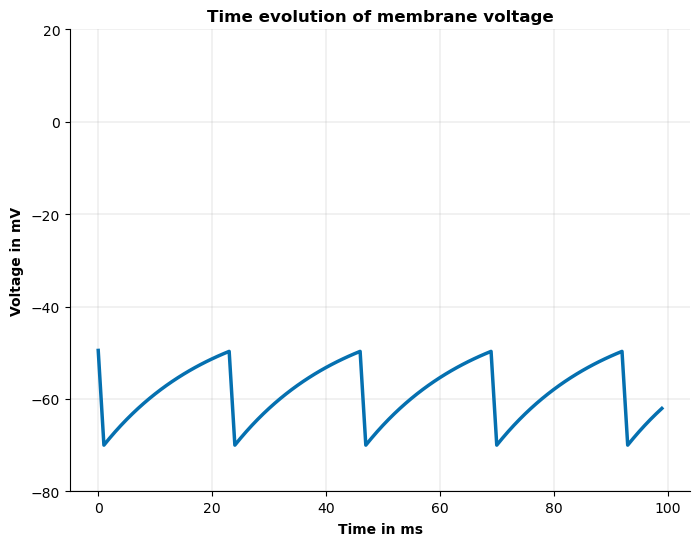

In [26]:
def voltage_evolution(I_e, el, tau_m, v):
    dt = 1 # in ms
    r_m = 100e6 # Ohm
    v_reset = -70 # mV
    v_th = -50 # mV


    v_list = []
    t_list = []
    I_e *= 1e-8 
    # here we multiply by 10^-8, you can also just provide the value to the function, 
    # but it does not work with interact then, since the numbers are too small
    for ii in range(100):
        if v <= v_th:
            dv_dt = (-v + el)/tau_m + r_m * I_e
            v = v + dv_dt * dt
        else:
            v = v_reset
        v_list.append(v) 
        t_list.append(ii*dt) # we multiply our time step with our iteration variable to get the time


    return v_list, t_list


def run_simulation_and_show_plot(I_e):

    v_list, t_list = voltage_evolution(I_e, el, tau_m, v)

    plt.figure()
    plt.title('Time evolution of membrane voltage')

    plt.plot(t_list,v_list,linewidth=2.5)

    plt.xlabel('Time in ms')
    plt.ylabel('Voltage in mV')

    plt.ylim([-80,20])
    plt.show()

''' you can either use interact ''' 
# interact(run_simulation_and_show_plot, I_e=(-2,6,1))
''' or simply call the function'''
run_simulation_and_show_plot(I_e = 1)